# Homework 4: Decision Tree Exercise, Loan Repayment
## Rob Taylor, Collaborating with Sharon Lynch Grey
### AI 240 Programming Machine Learning
*Problem* -  Design and develop a Machine learning model that can help in Loan repayment Prediction using Decision Tree algorithm


*Dataset*  - Loan Repayment dataset
The Loan Repayment dataset is made up of 1000 rows and six columns. Each row represents information about a particular person that relates to loan repayment. This dataset is perfect for classification algorithms such as the decision tree. The dataset includes these six columns:

* Initial payment.
* Last payment.
* Credit score.
* House number.
* Sum.
* Result.

The steps in this notebook should include:

* Data Exploration: Understanding the dataset and key features.
* Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
* Modeling: Implementing and evaluating machine learning model - Decision Tree
* Evaluation: Evaluate the performance of the model.

# Setup

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Training tools for Data Processing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [5]:
# Modeling Tools
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap

In [6]:
# Evaluation Tools
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Get the data from CSV

In [8]:
# load into datafram
df = pd.read_csv('Loans_Dataset.csv')

# Data Exploration
Understanding the dataset and key features.
Load, Describe, Find Info, Top/Bot 5 rows, list any key features
Plot bar chart, Distribution Chart, Heat Maps


In [10]:
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [11]:
df.tail()

,initial_payment,last_payment,credit_score,house_number,sum,result
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No
999,168,14798,834,4937,20737,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1000 non-null   int64 
 1   last_payment     1000 non-null   int64 
 2   credit_score     1000 non-null   int64 
 3   house_number     1000 non-null   int64 
 4   sum              1000 non-null   int64 
 5   result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [13]:
df.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000
std,115.81539,1440.15617,259.796059,565.164179,1589.943875
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000


In [14]:
# I'm not sure if Yes means repaid the loan or didn't repay the loan
df[df['result'] == 'yes'].describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,479.000000,479.000000,479.000000,479.000000,479.000000
mean,288.118998,11241.983299,506.359081,3880.189979,15916.651357
std,115.211632,809.263330,258.116538,560.312353,869.227088
min,100.000000,10005.000000,105.000000,3003.000000,13515.000000
25%,189.500000,10563.000000,273.500000,3379.000000,15331.000000
50%,279.000000,11144.000000,477.000000,3804.000000,16010.000000
75%,384.000000,11827.000000,718.000000,4340.000000,16612.500000
max,500.000000,13560.000000,996.000000,4993.000000,17254.000000


In [15]:
# So, I'm comparing against the NO as well...
df[df['result'] == 'No'].describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,521.000000,521.000000,521.000000,521.000000,521.000000
mean,300.065259,13591.120921,547.976967,4161.996161,18601.159309
std,116.184020,856.818663,259.984865,535.659931,838.692127
min,100.000000,11193.000000,100.000000,3020.000000,17266.000000
25%,201.000000,13008.000000,330.000000,3747.000000,17880.000000
50%,300.000000,13614.000000,568.000000,4211.000000,18535.000000
75%,405.000000,14272.000000,770.000000,4606.000000,19187.000000
max,499.000000,14996.000000,997.000000,5000.000000,20737.000000


This is very unnerving. The higest YES is 997 - that's an incredible credit score. But NO's highest is 996 - equally high. So people with exceptional credit scores both do and don't get the loans? Looking again, the Average NO credit score is higher than the average YES credit score. Similarlly, the Average initial payment for NO is higher than YES. 

So, this makes me think that Loans Dataset asks the question, "Did they *default* on the loan?" "No, they didn't" "Yes, they did." This doesn't seem intuitive. Yes is usually good, while No is usually bad. I really don't know if I'm interpreting this correctly.

In [17]:
# Check for inconsistent data.
df.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

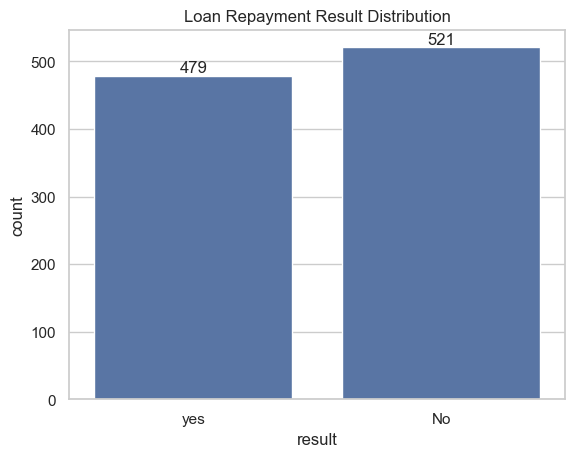

In [18]:
# Bar chart for the target variable
sns.set(style="whitegrid")

# Just a Count plot with labeled bars
ax = sns.countplot(data=df, x='result')

ax.bar_label(ax.containers[0])  # Access the first container in the list

plt.title("Loan Repayment Result Distribution")
plt.show()

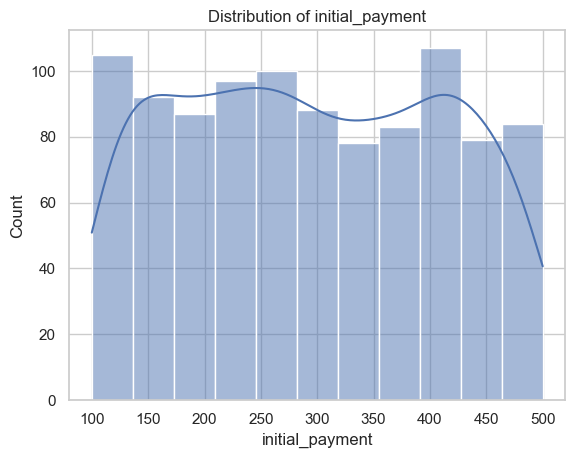

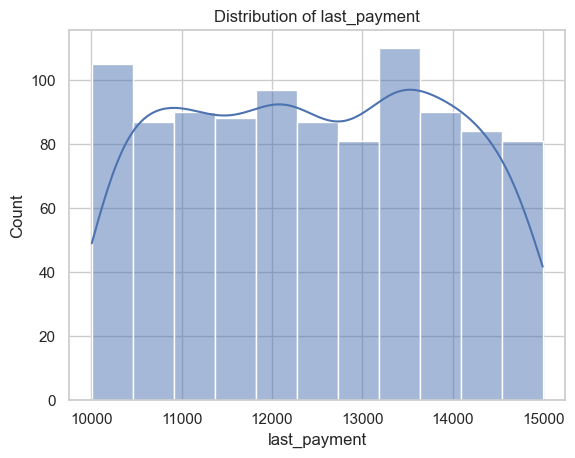

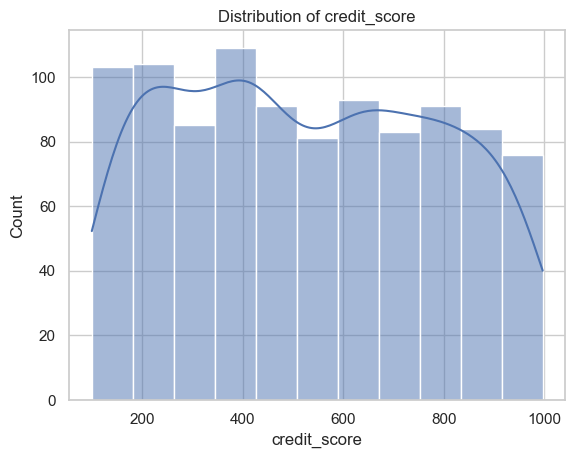

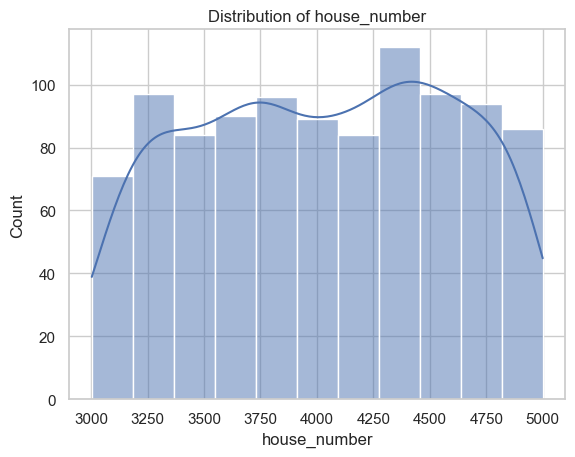

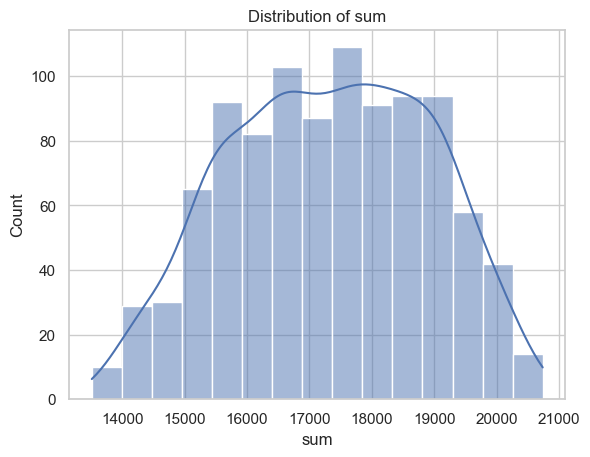

In [19]:
# Distribution plots for numerical features
num_cols = ['initial_payment', 'last_payment', 'credit_score', 'house_number', 'sum']

# why is house number even in here?? 
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

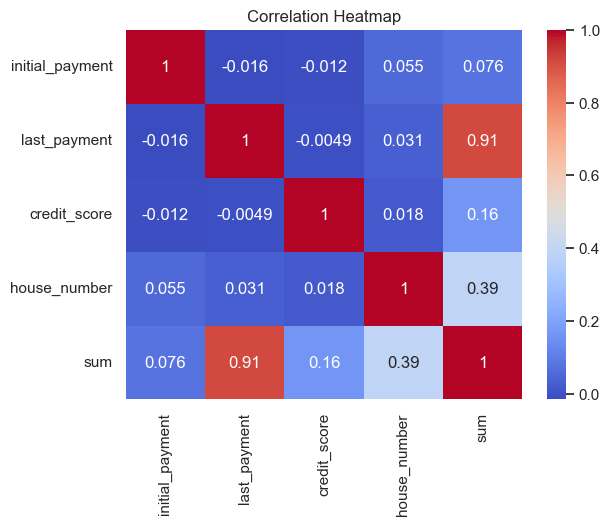

In [20]:
# Heatmap 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.show()


In [21]:
count_non_unique = df['house_number'].value_counts()

print("Non-unique rows:\n", count_non_unique)

Non-unique rows:
 house_number
4177    4
3251    4
4745    4
3815    4
3374    4
       ..
4766    1
4398    1
3601    1
3851    1
4937    1
Name: count, Length: 773, dtype: int64


# Data PreProcessing
Cleaning the data, handling missing values, and normalizing features.
Use standard scalar

In [23]:
# Get rid of any NA values (In looking at the data, it didn't seem like there were but still...)
df = df.dropna()

In [24]:
# Drop HOUSE NUMBER - all I can guess is that this is a red herring
df = df.drop(columns=['house_number'])

In [25]:
# Separate features from result (result is the dependent variable)
X = df.drop('result', axis=1)
y = df['result']

In [26]:
# Some testing to make sure I didn't leave the result set in there:
print(df.columns)
print(X.columns)

Index(['initial_payment', 'last_payment', 'credit_score', 'sum', 'result'], dtype='object')
Index(['initial_payment', 'last_payment', 'credit_score', 'sum'], dtype='object')


In [27]:
# Convert string labels to binary - and why is one capital the other lower case?
y = y.map({'No': 0, 'yes': 1})

In [28]:
# Normalize features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Modeling using Decision Tree
Implementing and evaluating machine learning model
Create Decision Tree Classifier, feed the model, predict with the test data set

In [30]:
# Split data (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and train the model using the ultimate question of life, the universe and everything
#model = DecisionTreeClassifier(random_state=42)
#model.fit(X_train, y_train)

In [32]:
# Create the predictions
#y_pred = model.predict(X_test)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=42, shuffle=True
)

In [34]:
# Create and train the model using the ultimate question of life, the universe and everything
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Create the predictions
y_pred = model.predict(X_test)

# Evaluation
Evaluate the model 
Which performance steps are applicable

In [37]:
# Let's do some calculations (skylearn):
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [38]:
# Classification report (skylearn)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       425

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [39]:
# Let's build a Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [40]:
cnf_matrix

array([[475,   0],
       [  0, 425]], dtype=int64)

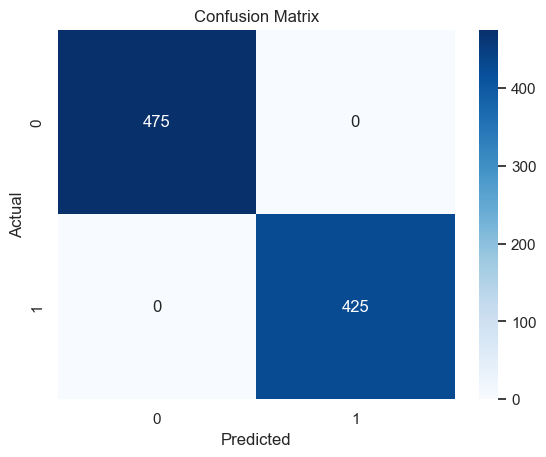

In [41]:
# Confusion matrix heatmap
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### What?
This doesn't seem right. All values are 1.0. Not that I'm disappointed, but that I'm totally confused as to what the data means and this thing just nailed a 100% prediction score? 

So, <b>100% of the time, the model correctly predicted outcome.</b> 

In [44]:
print(y.value_counts())         # Entire dataset
print(y_test.value_counts())    # Test set

result
0    521
1    479
Name: count, dtype: int64
result
0    475
1    425
Name: count, dtype: int64


In [45]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


,Actual,Predicted
521,0,0
737,0,0
740,0,0
660,0,0
411,1,1
...,...,...
251,1,1
726,0,0
461,1,1
455,1,1


In [48]:
# Compare feature averages by class
print(df.groupby('result').mean(numeric_only=True))

        initial_payment  last_payment  credit_score           sum
result                                                           
No           300.065259  13591.120921    547.976967  18601.159309
yes          288.118998  11241.983299    506.359081  15916.651357


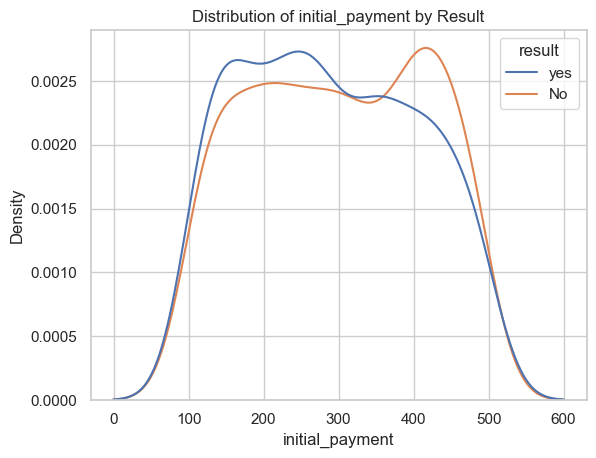

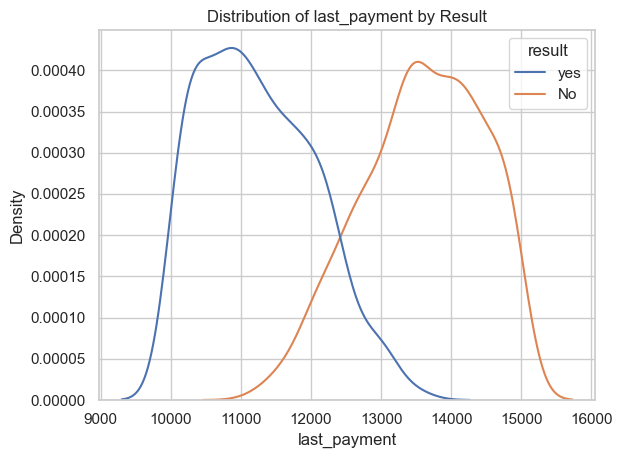

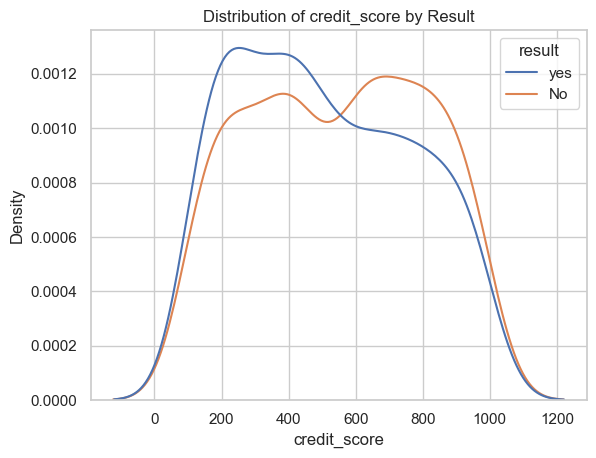

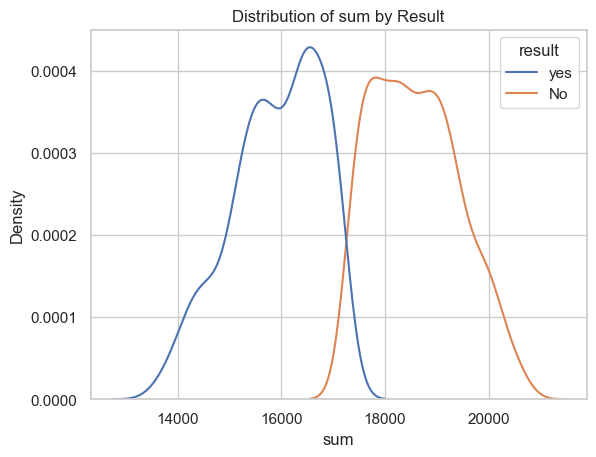

In [50]:
for col in X.columns:
    sns.kdeplot(data=df, x=col, hue='result', common_norm=False)
    plt.title(f'Distribution of {col} by Result')
    plt.show()

### Initial Payment & Credit Score
Overlap at both ends which means these features aren’t very predictive alone.

### Last Payment & Sum
These appear highly skewed and separated (one or the other). So, the little overlap they do have indicates that these features could be telling the story to AI by themselves. Then the other features may be the tipping point. This could account for the perfect score. 


# Bonus The Male/Female predictions
#### So I want to know if the model is more or less accurate if we isolate the data to men or women specifically.

In [47]:
# Split the data into males and females
df_male = df_heart[df_heart['sex'] == 1]  # Male data
df_female = df_heart[df_heart['sex'] == 0]  # Female data

# Separate features for males and females
X_male = df_male.drop('heart_disease', axis=1)
y_male = df_male['heart_disease']
X_female = df_female.drop('heart_disease', axis=1)
y_female = df_female['heart_disease']

# Retrain the models
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Step 4: Train separate models
model_male = LogisticRegression(max_iter=1000)
model_male.fit(X_m_train, y_m_train)

model_female = LogisticRegression(max_iter=1000)
model_female.fit(X_f_train, y_f_train)

print("Classification Report for Males:")
y_m_pred = model_male.predict(X_m_test)
print(classification_report(y_m_test, y_m_pred))

print("Classification Report for Females:")
y_f_pred = model_female.predict(X_f_test)
print(classification_report(y_f_test, y_f_pred))

NameError: name 'df_heart' is not defined

### What I'm Seeing

By breaking this into **male** and **female** groups, we can see that:

- For **men**, the model predictions are similar to the original overall results, with an accuracy of around **80%**.
- For **women**, accuracy **jumps to 94%**!  
  - **Precision**: `1.00` for *no disease*, `0.92` for *disease*.
  - This is **outstanding performance**.

If you are **female** and you`re showing these symptoms/features, the model seems to work **very well**.

- For **men**, the model is still good, solid and balanced.
- But it`s clear the model is a **better predictor in women**, at least on this dataset.